# Endometrioid Cancer

To solve the question: "What's the relationship between the PTEN tumor suppressor gene and Endometrioid Cancer when considering the influence of age?"

# 1.Data porcessing

In [6]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.UCEC.sampleMap_UCEC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,CDE_ID_3226963,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_DNAMethyl_UCEC,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_UCEC,...,_GENOMIC_ID_TCGA_UCEC_miRNA_HiSeq,_GENOMIC_ID_TCGA_UCEC_exp_GAV2,_GENOMIC_ID_TCGA_UCEC_gistic2thd,_GENOMIC_ID_TCGA_UCEC_G4502A_07_3,_GENOMIC_ID_TCGA_UCEC_gistic2,_GENOMIC_ID_data/public/TCGA/UCEC/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_UCEC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_UCEC_hMethyl450,_GENOMIC_ID_TCGA_UCEC_hMethyl27,_GENOMIC_ID_TCGA_UCEC_exp_GAV2_exon
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,Indeterminate,TCGA-2E-A9G8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-2E-A9G8-01,NaN,TCGA-2E-A9G8-01A-11D-A402-01,NaN,TCGA-2E-A9G8-01A-11D-A402-01,TCGA-2E-A9G8-01,TCGA-2E-A9G8-01,TCGA-2E-A9G8-01A-11D-A409-05,NaN,NaN
TCGA-4E-A92E-01,MSS,TCGA-4E-A92E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-4E-A92E-01,NaN,TCGA-4E-A92E-01A-11D-A37M-01,NaN,TCGA-4E-A92E-01A-11D-A37M-01,TCGA-4E-A92E-01,TCGA-4E-A92E-01,TCGA-4E-A92E-01A-11D-A37Q-05,NaN,NaN
TCGA-5B-A90C-01,MSS,TCGA-5B-A90C-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-5B-A90C-01,NaN,TCGA-5B-A90C-01A-11D-A37M-01,NaN,TCGA-5B-A90C-01A-11D-A37M-01,TCGA-5B-A90C-01,TCGA-5B-A90C-01,TCGA-5B-A90C-01A-11D-A37Q-05,NaN,NaN
TCGA-5S-A9Q8-01,MSS,TCGA-5S-A9Q8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TCGA-5S-A9Q8-01,NaN,TCGA-5S-A9Q8-01A-11D-A402-01,NaN,TCGA-5S-A9Q8-01A-11D-A402-01,TCGA-5S-A9Q8-01,TCGA-5S-A9Q8-01,TCGA-5S-A9Q8-01A-11D-A409-05,NaN,NaN
TCGA-A5-A0G1-01,MSI-H,TCGA-A5-A0G1-01,Quiet,C6-UCEC,UCEC non-CIMP c3,cluster 4,UCEC-like c5,UCEC-like c11,miRNA cluster 14,cluster 2,...,TCGA-A5-A0G1-01,c4bc1759-7de2-427c-a936-431f343ea929,TCGA-A5-A0G1-01A-11D-A120-01,NaN,TCGA-A5-A0G1-01A-11D-A120-01,TCGA-A5-A0G1-01,TCGA-A5-A0G1-01,TCGA-A5-A0G1-01A-11D-A123-05,NaN,c4bc1759-7de2-427c-a936-431f343ea929


In [5]:
gene_data.head()

,TCGA-A5-A2K7-01,TCGA-FL-A1YI-11,TCGA-EO-A3AS-01,TCGA-EY-A549-01,TCGA-EO-A3B0-01,TCGA-KJ-A3U4-01,TCGA-EY-A2OQ-01,TCGA-PG-A7D5-01,TCGA-B5-A0JN-01,TCGA-FL-A1YU-11,...,TCGA-D1-A3DA-01,TCGA-KP-A3W3-01,TCGA-AJ-A3IA-01,TCGA-AJ-A8CW-01,TCGA-H5-A2HR-01,TCGA-EY-A547-01,TCGA-FL-A1YV-11,TCGA-BK-A6W3-01,TCGA-BK-A56F-01,TCGA-EO-A3AY-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.033992,0.180208,-0.826192,-0.736292,-2.025392,-0.081192,-1.068392,-1.211492,-0.320192,-0.429692,...,-2.175492,-0.853592,1.326408,-1.762692,-2.573492,-1.060992,0.031708,-0.511492,-0.078592,-0.811292
HIF3A,-1.223126,0.177574,1.394374,-3.098826,-2.132926,0.963374,1.065174,4.560774,4.335374,0.004474,...,0.164374,1.392574,2.820074,-0.594626,0.187374,0.288874,2.975574,-5.554726,-2.382626,-4.858826
RNF17,0.021565,0.388665,0.623265,0.864865,-0.531035,0.191265,-0.531035,-0.056235,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.075365,-0.531035,-0.531035,-0.023335,-0.531035
RNF10,0.131928,0.113528,-0.674772,0.069228,-1.730572,0.753428,-0.088272,0.310428,-0.404072,0.085028,...,0.324828,0.374528,0.155428,0.232928,0.333328,-0.196272,-0.015872,0.207228,-0.087972,0.444328
RNF11,-1.084278,0.841122,0.452222,-0.060678,-0.507378,-0.148578,-1.010478,-0.687778,-0.316878,-0.230478,...,-0.116778,0.330222,-0.106878,-0.629278,-2.788478,-0.474078,0.259422,-0.573678,-0.487378,-2.417778


In [8]:
gene_fullname = 'PTEN tumor suppressor gene'
gene = 'PTEN'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Endometrioid Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 123 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-A5-A2K7-01,-1.033992,-1.223126,0.021565,0.131928,-1.084278,-1.83131,-0.069394,-0.768546,-0.423399,-2.486172,...,-0.748878,-1.587117,-0.480633,1.71871,0.053823,-0.389886,-1.205327,0.675705,-3.432333,-0.223312
TCGA-FL-A1YI-11,0.180208,0.177574,0.388665,0.113528,0.841122,-0.31241,0.862306,3.146454,-0.423399,-0.765572,...,0.170822,1.079683,0.147667,-0.36169,0.379723,1.522714,1.736573,-0.466595,2.958767,-0.000912
TCGA-EO-A3AS-01,-0.826192,1.394374,0.623265,-0.674772,0.452222,-0.42061,-0.213194,0.692854,-0.423399,0.639228,...,-0.059278,-1.587117,-1.040933,-0.12709,0.459123,-0.268786,-0.588927,0.493405,-0.784633,0.504988
TCGA-EY-A549-01,-0.736292,-3.098826,0.864865,0.069228,-0.060678,-0.52181,0.800206,-2.315846,-0.423399,0.902328,...,-0.255378,-1.587117,-0.989633,3.05271,0.330123,-0.943686,-1.858127,1.508905,-1.446033,0.049488
TCGA-EO-A3B0-01,-2.025392,-2.132926,-0.531035,-1.730572,-0.507378,-1.03701,0.426606,1.944354,-0.423399,-2.075872,...,3.291822,-1.587117,0.026267,0.18671,0.516423,-0.173586,-1.206827,-0.006895,-0.996733,0.172388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EY-A547-01,-1.060992,0.288874,0.075365,-0.196272,-0.474078,-2.14861,-0.766194,-1.300646,-0.423399,-2.934372,...,1.470622,-1.587117,-0.660933,3.33401,-0.654377,-1.401686,-1.674427,-0.234295,-2.008333,-0.547312
TCGA-FL-A1YV-11,0.031708,2.975574,-0.531035,-0.015872,0.259422,-0.21471,0.911206,2.582054,0.187801,-1.190172,...,1.900722,0.275783,-0.314333,-0.67019,0.859623,1.779814,0.838773,-0.177695,2.522967,-0.504112
TCGA-BK-A6W3-01,-0.511492,-5.554726,-0.531035,0.207228,-0.573678,-0.99801,0.031506,-1.413046,0.246701,-0.061172,...,-0.375278,-1.587117,0.003367,-1.28139,0.116623,-1.248786,-0.689927,0.448805,-0.523733,0.338888
TCGA-BK-A56F-01,-0.078592,-2.382626,-0.023335,-0.087972,-0.487378,-0.29061,0.747306,1.852654,0.084301,-0.986872,...,-0.748878,0.541883,-0.843833,2.69701,0.742923,-0.459686,-1.078027,0.616905,1.161867,0.126588


In [9]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,CDE_ID_3226963,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_DNAMethyl_UCEC,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_UCEC,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8-01,Indeterminate,TCGA-2E-A9G8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-0.987117,-0.262433,4.06601,0.333923,-2.068486,-1.501827,0.998505,-2.315833,0.293288
TCGA-4E-A92E-01,MSS,TCGA-4E-A92E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,MSS,TCGA-5B-A90C-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,MSS,TCGA-5S-A9Q8-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A0G1-01,MSI-H,TCGA-A5-A0G1-01,Quiet,C6-UCEC,UCEC non-CIMP c3,cluster 4,UCEC-like c5,UCEC-like c11,miRNA cluster 14,cluster 2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.22 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4E-A92E-01,-19818.0,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,-25518.0,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,-18785.0,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A1OH-01,-31451.0,-1.823192,5.243674,-0.531035,-0.365172,-0.476078,-0.72361,0.165706,0.470854,-0.423399,...,0.330522,0.758183,0.961667,3.00791,0.208623,0.436514,0.311373,-1.538495,-0.985533,-0.116212
TCGA-A5-A2K2-01,-28456.0,0.298608,0.782374,-0.531035,0.220628,-1.015878,-1.27891,0.274106,-1.342346,-0.423399,...,-0.748878,-1.587117,-2.656233,0.31391,-0.657377,-2.881786,-1.820127,-1.238395,-0.729333,-0.655912


# 2. Preliminary analysis

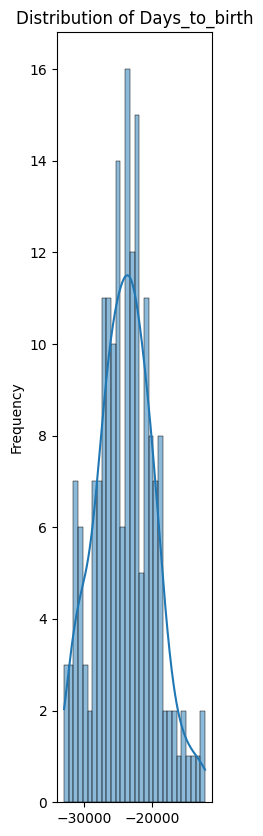

KeyError: 'Endometrioid Cancer'

<Figure size 1000x600 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(2, 10))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col,], categorical_columns=[trait])


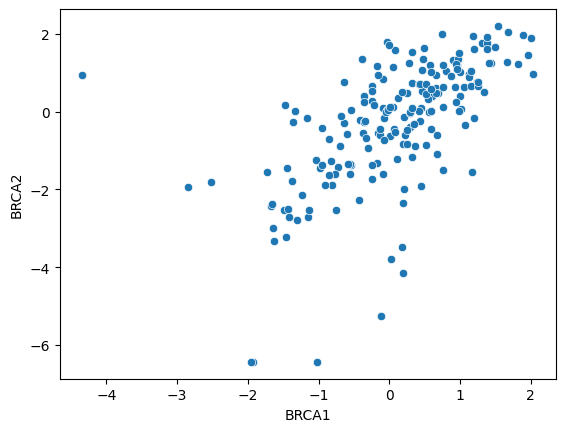

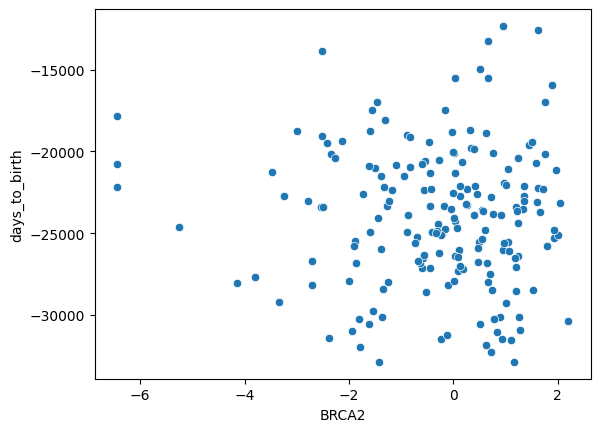

In [15]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

# 3. Do regression & Cross Validation

In [16]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4E-A92E-01,54,0.215608,-0.178726,7.416765,0.115128,-0.378178,-0.71591,1.207206,-0.991846,0.118001,...,-0.207478,-1.587117,-0.143633,0.93371,0.174223,-1.361886,-0.877027,0.217905,0.162267,-0.167012
TCGA-5B-A90C-01,69,-0.764492,-2.620626,-0.531035,-0.360672,-0.411278,-0.38501,0.412606,-2.099246,-0.423399,...,1.194822,-0.407417,-1.269133,0.77641,0.573223,-1.600886,-0.710827,-0.555895,-0.691533,0.111388
TCGA-5S-A9Q8-01,51,-0.907792,-3.403426,-0.531035,-0.019372,-1.538578,-1.41421,0.358106,1.501754,-0.423399,...,-0.748878,-1.587117,-1.495533,1.98251,0.406423,-0.888386,-1.374527,0.759805,-1.819733,0.012988
TCGA-A5-A1OH-01,86,-1.823192,5.243674,-0.531035,-0.365172,-0.476078,-0.72361,0.165706,0.470854,-0.423399,...,0.330522,0.758183,0.961667,3.00791,0.208623,0.436514,0.311373,-1.538495,-0.985533,-0.116212
TCGA-A5-A2K2-01,77,0.298608,0.782374,-0.531035,0.220628,-1.015878,-1.27891,0.274106,-1.342346,-0.423399,...,-0.748878,-1.587117,-2.656233,0.31391,-0.657377,-2.881786,-1.820127,-1.238395,-0.729333,-0.655912


In [17]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_16124\1545064521.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std


KeyError: 'Endometrioid Cancer'

In [21]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)


NameError: name 'coefficients' is not defined

In [19]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)


NameError: name 'coefficients' is not defined

In [22]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between PTEN tumor suppressor gene and Endometrioid Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the PTEN tumor suppressor gene and Endometrioid Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the PTEN tumor suppressor gene and Endometrioid Cancer when considering the influence of age.




In [23]:
threshold = 0.2
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)


In [24]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:




Hypothesis Confirmation and Conclusion:

Variable:PTEN Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA1 gene and Colon Cancer when considering the influence of age.

Variable: PTEN0 Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRCA2 gene and Colon Cancer when considering the influence of age.